# Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mempersiapkan environment dengan mengimpor library yang dibutuhkan untuk analisis data,
# pembangunan model machine learning, dan visualisasi.

# Import Data

In [2]:
url = 'https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/breast-cancer.csv'
df = pd.read_csv(url)
df.head()

#Kode ini memuat dataset breast cancer dari URL dan menampilkan 5 baris pertama.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis (EDA)

In [3]:
df.info()

# Kode ini menampilkan informasi ringkas tentang DataFrame, termasuk tipe data kolom dan jumlah nilai yang tidak kosong.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

# Kode ini menampilkan statistik deskriptif dari data numerik dalam DataFrame, seperti rata-rata, standar deviasi,
# dan kuartil.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.isnull().sum()

# Kode ini menghitung dan menampilkan jumlah nilai yang hilang (missing values) di setiap kolom DataFrame.

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [13]:
from sklearn.preprocessing import LabelEncoder

if df['diagnosis'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Kode ini mengubah kolom 'diagnosis' menjadi numerik jika tipe datanya masih berupa objek (string).

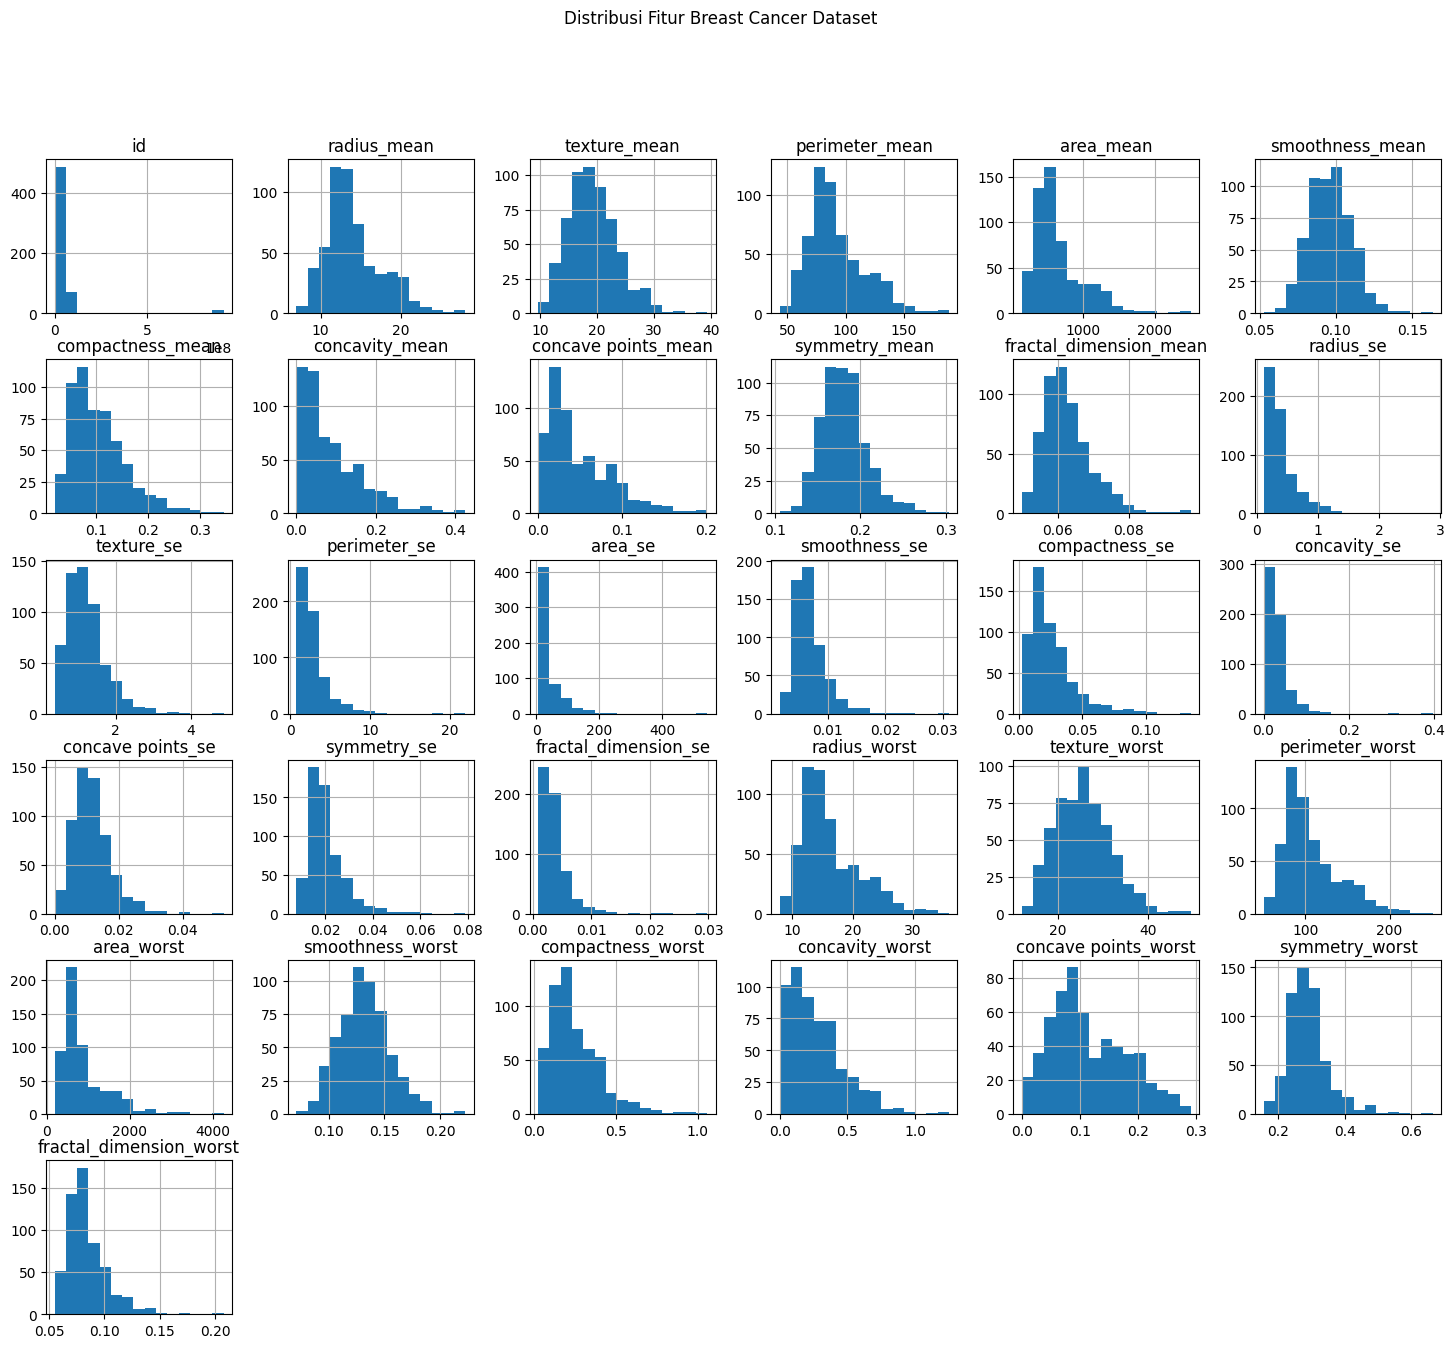

In [8]:
df.hist(bins=15, figsize=(18, 15))
plt.suptitle("Distribusi Fitur Breast Cancer Dataset")
plt.show()

# Kode ini membuat dan menampilkan histogram untuk setiap kolom numerik dalam DataFrame untuk memvisualisasikan
# distribusi data.

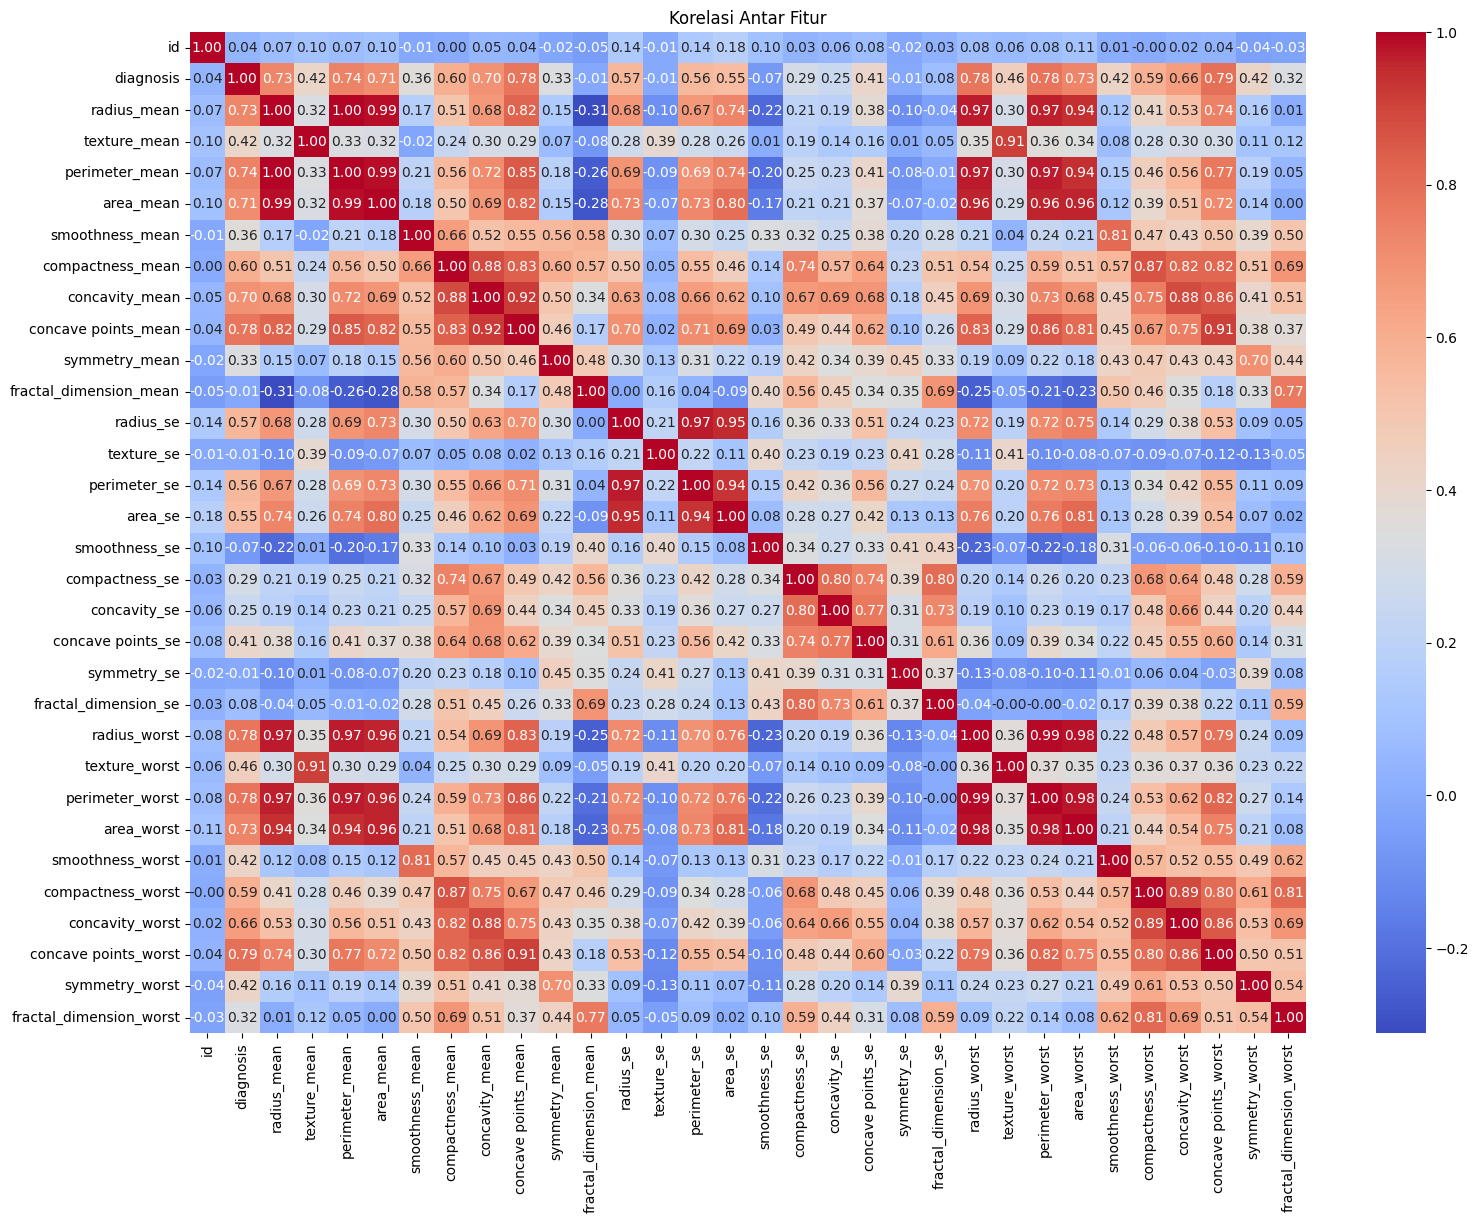

In [15]:
plt.figure(figsize=(18, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur")
plt.show()

# Kode ini membuat dan menampilkan heatmap untuk memvisualisasikan korelasi antar fitur numerik dalam DataFrame.

# Preprocessing dan Split Data

In [16]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Train: {X_train.shape}")
print(f"Ukuran Data Test: {X_test.shape}")

# Kode ini membagi data menjadi set pelatihan dan pengujian serta menampilkan ukuran masing-masing set.

Ukuran Data Train: (455, 31)
Ukuran Data Test: (114, 31)


# Decision Tree

In [18]:
# a. Defining the model using criterion Entropy
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [19]:
# b. Predict the test set results
y_pred_dt = dt_model.predict(X_test)

In [20]:
# c. Check accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree (Entropy) - Accuracy Score: {accuracy_dt}")

Decision Tree (Entropy) - Accuracy Score: 0.956140350877193


In [22]:
# d. Check for overfitting and underfitting
train_accuracy_dt = dt_model.score(X_train, y_train)
test_accuracy_dt = dt_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy_dt}")
print(f"Testing Accuracy: {test_accuracy_dt}")

Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193


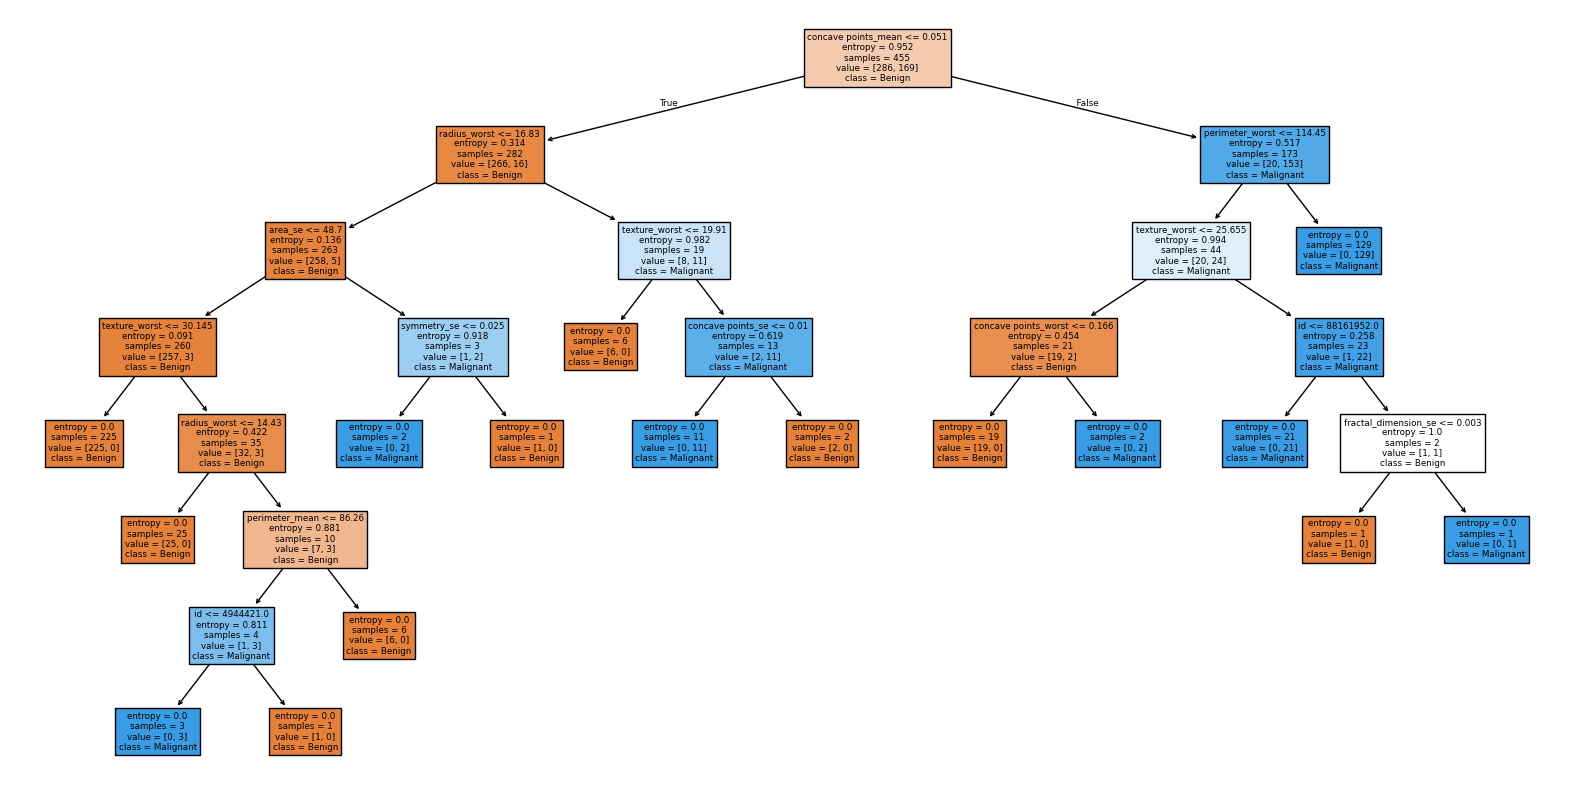

In [24]:
# prompt: lakukan visualisasi decision tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.show()

Confusion Matrix for Decision Tree:
 [[70  1]
 [ 4 39]]


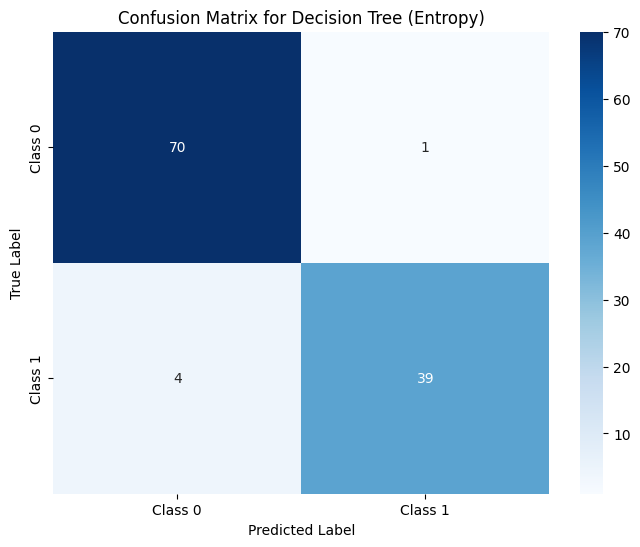

In [28]:
# f. Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:\n", conf_matrix_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree (Entropy)")
plt.show()


In [29]:
# g. Classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:\n", class_report_dt)

print(f"Decision Tree (Entropy) - Accuracy Score: {accuracy_dt}")

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Decision Tree (Entropy) - Accuracy Score: 0.956140350877193


# Naive Bayes

In [39]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Predict the test set results
y_pred_nb = nb_model.predict(X_test)



In [ ]:
# Check accuracy score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes - Accuracy Score: {accuracy_nb}")



In [ ]:
# Check for overfitting and underfitting
train_accuracy_nb = nb_model.score(X_train, y_train)
test_accuracy_nb = nb_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy_nb}")
print(f"Testing Accuracy: {test_accuracy_nb}")



In [ ]:
# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix for Naive Bayes:\n", conf_matrix_nb)



In [ ]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


In [39]:
# Classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report for Naive Bayes:\n", class_report_nb)

# K-Nearest-Neighbour(KNN)

In [32]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Anda dapat mengubah nilai n_neighbors
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [33]:
# Predict the test set results
y_pred_knn = knn_model.predict(X_test)


In [34]:
# Check accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN - Accuracy Score: {accuracy_knn}")



KNN - Accuracy Score: 0.7543859649122807


In [35]:
# Check for overfitting and underfitting
train_accuracy_knn = knn_model.score(X_train, y_train)
test_accuracy_knn = knn_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy_knn}")
print(f"Testing Accuracy: {test_accuracy_knn}")



Training Accuracy: 0.8417582417582418
Testing Accuracy: 0.7543859649122807


In [36]:
# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", conf_matrix_knn)



Confusion Matrix for KNN:
 [[63  8]
 [20 23]]


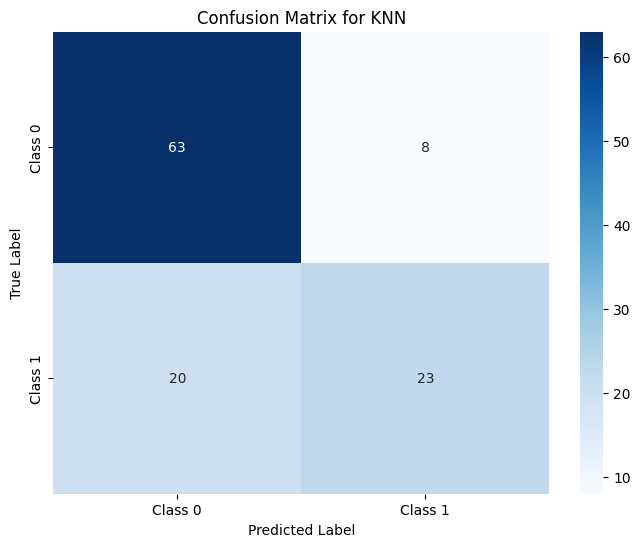

In [37]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show()



In [38]:
# Classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for KNN:\n", class_report_knn)

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114



# Perbandingan

In [40]:
print(f"Akurasi Decision Tree: {accuracy_dt:.2f}")
print(f"Akurasi Naive Bayes: {accuracy_nb:.2f}")
print(f"Akurasi KNN: {accuracy_knn:.2f}")

# Decision Tree memiliki nilai akurasi tertinggi dengan angka 0.96

Akurasi Decision Tree: 0.96
Akurasi Naive Bayes: 0.61
Akurasi KNN: 0.75
